In [363]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [364]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_021037e57f314a96ba456b41ff50196c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='trKTOQgLCuC2zyHj69iqvTayv3qRcaHPnmv3KfPhD9Lr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_021037e57f314a96ba456b41ff50196c.get_object(Bucket='datascienceprojects-donotdelete-pr-h3n6mcwhewbbma',Key='train_values.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [365]:

body = client_021037e57f314a96ba456b41ff50196c.get_object(Bucket='datascienceprojects-donotdelete-pr-h3n6mcwhewbbma',Key='train_labels.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

target = pd.read_csv(body)
target.head()


,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [366]:

body = client_021037e57f314a96ba456b41ff50196c.get_object(Bucket='datascienceprojects-donotdelete-pr-h3n6mcwhewbbma',Key='test_values.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test= pd.read_csv(body)
test.head()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [367]:
train.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id'],axis=1,inplace=True)

In [368]:
test.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id'],axis=1,inplace=True)

In [369]:
train.shape

(260601, 36)

In [370]:
test.shape

(86868, 36)

In [371]:
target.shape

(260601, 2)

In [372]:
res_train = pd.merge(train,target, on = 'building_id')

In [373]:
res_train.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,2,30,6,5,t,r,n,f,q,...,0,0,0,0,0,0,0,0,0,3
1,28830,2,10,8,7,o,r,n,x,q,...,0,0,0,0,0,0,0,0,0,2
2,94947,2,10,5,5,t,r,n,f,x,...,0,0,0,0,0,0,0,0,0,3
3,590882,2,10,6,5,t,r,n,f,x,...,0,0,0,0,0,0,0,0,0,2
4,201944,3,30,8,9,t,r,n,f,x,...,0,0,0,0,0,0,0,0,0,3


In [374]:
res_train.describe()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


**Visualizing the target variable**

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

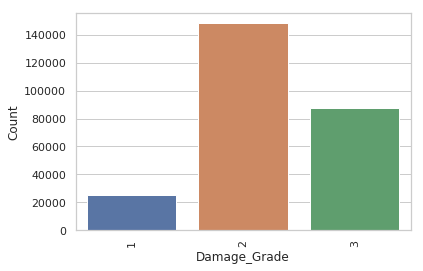

In [375]:
target = res_train['damage_grade'].value_counts()
print(target)
target = target.to_frame()
target.columns = ['Count']
target.index.names = ['Damage_Grade']
target['Damage_Grade'] = target.index 

#Plotting the Target variable
sns.set(style = 'whitegrid', color_codes = True)
sns.barplot(x = 'Damage_Grade', y = 'Count', data = target)
plt.xticks(rotation = 90)

**Univariate Analysis**

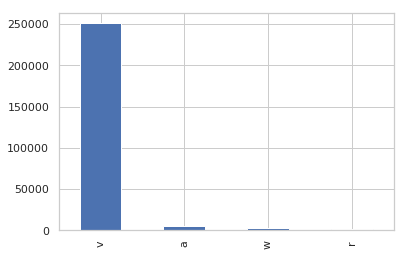

In [376]:
res_train['legal_ownership_status'].value_counts().plot.bar()

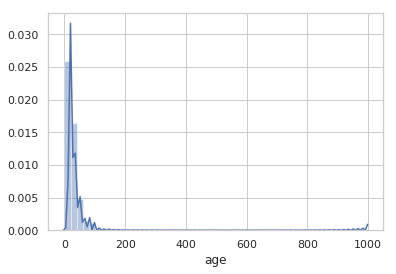

In [377]:
#Age of Building
sns.distplot(res_train['age'])

In [378]:
#Skewness
print("The skewness of Age of building is {}".format(res_train['age'].skew()))

The skewness of Age of building is 12.192494218852833


1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64


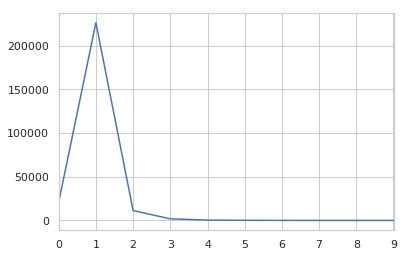

In [379]:
print(res_train['count_families'].value_counts())
res_train['count_families'].value_counts().sort_index().plot.line()

In [380]:
print("The skewness of Count of families is {}".format(res_train['count_families'].skew()))

The skewness of Count of families is 1.634757873477747


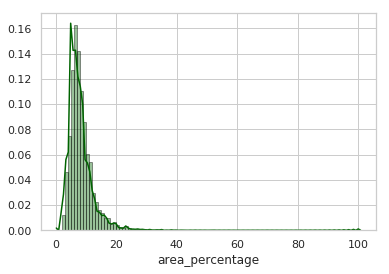

In [381]:
sns.distplot(res_train['area_percentage'],hist = True, color = 'darkgreen', bins = 100, hist_kws={'edgecolor':'black'})

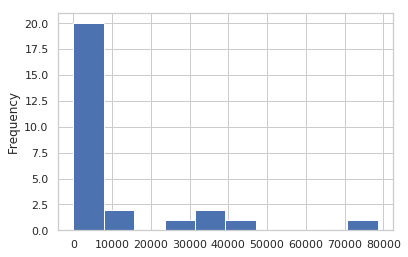

In [382]:
res_train['height_percentage'].value_counts().plot.hist()

**Bivariate analysis**

In [383]:
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [384]:
res_train['damage_grade']=res_train['damage_grade'].astype('int')

In [385]:
res_train.dtypes

building_id                                int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_timber                  int64
has_superstructure_bamboo                  int64
has_superstructure_r

In [386]:
#chi square test for relation between categorical input variables and target variable
cat = [c for c in res_train if res_train[c].dtypes == "object"]

In [387]:
def ChiSquareTest(cat,res_train):
  
  for c in cat:
    print(c)
    tab = pd.crosstab(res_train['damage_grade'], res_train[c])
    stat, p, dof, expected = chi2_contingency(tab)
    print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
     
    print(" ")

In [388]:
ChiSquareTest(cat,res_train)

land_surface_condition
dof=4
probability=0.950, critical=9.488, stat=449.671
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
foundation_type
dof=8
probability=0.950, critical=15.507, stat=48547.161
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
roof_type
dof=4
probability=0.950, critical=9.488, stat=30251.419
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
ground_floor_type
dof=8
probability=0.950, critical=15.507, stat=36430.849
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
other_floor_type
dof=6
probability=0.950, critical=12.592, stat=31487.392
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
position
dof=6
probability=0.950, critical=12.592, stat=1079.927
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
plan_configuration
dof=18
probability=0.950, critical=28.869, stat=1734.117
Dependent (reject H0)
significance=0.050, p=0.000


In [389]:
#check relation between binary input variables and target variable
cat_binary = [c for c in res_train if len(res_train[c].unique()) == 2]
cat_binary

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [390]:
def cramers_v(x, y):
  correlation_coeff = []
  for c in cat_binary:
    confusion_matrix = pd.crosstab(res_train[c],y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    correlation_coeff.append([c,np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))])
    
  return correlation_coeff

In [391]:
cramers_v(cat_binary, res_train['damage_grade'])

[['has_superstructure_adobe_mud', 0.07506707071252933],
 ['has_superstructure_mud_mortar_stone', 0.33516147110504957],
 ['has_superstructure_stone_flag', 0.06630852543488028],
 ['has_superstructure_cement_mortar_stone', 0.060447067803106914],
 ['has_superstructure_mud_mortar_brick', 0.06369471150720407],
 ['has_superstructure_cement_mortar_brick', 0.28040233672575793],
 ['has_superstructure_timber', 0.07089431875390018],
 ['has_superstructure_bamboo', 0.0640977815113471],
 ['has_superstructure_rc_non_engineered', 0.18698715785722],
 ['has_superstructure_rc_engineered', 0.2370315276503017],
 ['has_superstructure_other', 0.03287937190813863],
 ['has_secondary_use', 0.08007138772408424],
 ['has_secondary_use_agriculture', 0.04699933477543077],
 ['has_secondary_use_hotel', 0.1079622055217344],
 ['has_secondary_use_rental', 0.10093316465141108],
 ['has_secondary_use_institution', 0.033424192728411004],
 ['has_secondary_use_school', 0.014371641975359192],
 ['has_secondary_use_industry', 0.01

In [392]:
ChiSquareTest(cat_binary,res_train)

has_superstructure_adobe_mud
dof=2
probability=0.950, critical=5.991, stat=1470.498
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_superstructure_mud_mortar_stone
dof=2
probability=0.950, critical=5.991, stat=29276.035
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_superstructure_stone_flag
dof=2
probability=0.950, critical=5.991, stat=1147.811
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_superstructure_cement_mortar_stone
dof=2
probability=0.950, critical=5.991, stat=954.193
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_superstructure_mud_mortar_brick
dof=2
probability=0.950, critical=5.991, stat=1059.258
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_superstructure_cement_mortar_brick
dof=2
probability=0.950, critical=5.991, stat=20491.798
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_superstructu

In [393]:
res_train.drop(['has_secondary_use_use_police','building_id'], axis = 1,inplace=True)

In [394]:
res_test= test.drop(['has_secondary_use_use_police','building_id'],axis=1)

In [395]:
res_train.shape

(260601, 35)

In [396]:
res_test.shape

(86868, 34)

In [397]:
#relation between contimuous input variables and target variable
cont = [c for c in res_train if len(res_train[c].unique()) > 15]
cont

['age', 'area_percentage', 'height_percentage']

In [398]:
indices = 0,1,2,3
cont = [i for j, i in enumerate(cont) if j not in indices]

Feature Engineering

In [399]:
def calculateDistribution(cat, res_train):
  for c in cat:
    print(c)
    print((res_train[c].value_counts())/ len(res_train[c]))
    print(" ")

In [400]:
calculateDistribution(cat,res_train)

land_surface_condition
t    0.831758
n    0.136331
o    0.031911
Name: land_surface_condition, dtype: float64
 
foundation_type
r    0.841117
w    0.058012
u    0.054720
i    0.040595
h    0.005556
Name: foundation_type, dtype: float64
 
roof_type
n    0.701617
q    0.236285
x    0.062099
Name: roof_type, dtype: float64
 
ground_floor_type
f    0.804368
x    0.095460
v    0.094370
z    0.003853
m    0.001949
Name: ground_floor_type, dtype: float64
 
other_floor_type
q    0.634234
x    0.166722
j    0.152889
s    0.046155
Name: other_floor_type, dtype: float64
 
position
s    0.775477
t    0.164604
j    0.050967
o    0.008952
Name: position, dtype: float64
 
plan_configuration
d    0.959597
q    0.021842
u    0.014002
s    0.001328
c    0.001247
a    0.000967
o    0.000610
m    0.000177
n    0.000146
f    0.000084
Name: plan_configuration, dtype: float64
 
legal_ownership_status
v    0.962924
a    0.021151
w    0.010272
r    0.005652
Name: legal_ownership_status, dtype: float64
 


In [401]:
res_train_copy = res_train
res_train_copy.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_other,damage_grade
0,2,30,6,5,t,r,n,f,q,t,...,0,0,0,0,0,0,0,0,0,3
1,2,10,8,7,o,r,n,x,q,s,...,0,0,0,0,0,0,0,0,0,2
2,2,10,5,5,t,r,n,f,x,t,...,0,0,0,0,0,0,0,0,0,3
3,2,10,6,5,t,r,n,f,x,s,...,0,0,0,0,0,0,0,0,0,2
4,3,30,8,9,t,r,n,f,x,s,...,0,0,0,0,0,0,0,0,0,3


In [402]:
res_test_copy = res_test
res_test_copy.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_other
0,3,20,7,6,t,r,n,f,q,s,...,0,0,0,0,0,0,0,0,0,0
1,2,25,13,5,t,r,n,f,q,s,...,1,1,0,0,0,0,0,0,0,0
2,2,5,4,5,t,r,n,f,q,s,...,0,0,0,0,0,0,0,0,0,0
3,1,0,19,3,t,r,x,v,j,t,...,1,0,0,1,0,0,0,0,0,0
4,3,15,8,7,t,r,q,f,q,t,...,0,0,0,0,0,0,0,0,0,0


In [403]:
res_train_copy['IsV'] = (res_train_copy["legal_ownership_status"] == "v") * 1 
res_test_copy['IsV'] = (res_test_copy["legal_ownership_status"] == "v") * 1

In [404]:
res_train_copy['IsT'] = (res_train_copy["land_surface_condition"] == "t") * 1
res_test_copy['IsT'] = (res_test_copy["land_surface_condition"] == "t") * 1

In [405]:
res_train_copy['IsR'] = (res_train_copy["foundation_type"] == "r") * 1
res_test_copy['IsR'] = (res_test_copy["foundation_type"] == "r") * 1

In [406]:
res_train_copy['IsN'] = (res_train_copy["roof_type"] == "n") * 1
res_test_copy['IsN'] = (res_test_copy["roof_type"] == "n") * 1

In [407]:
res_train_copy['IsF'] = (res_train_copy["ground_floor_type"] == "f") * 1
res_test_copy['IsF'] = (res_test_copy["ground_floor_type"] == "f") * 1

In [408]:
res_train_copy['IsQ'] = (res_train_copy["other_floor_type"] == "q") * 1
res_test_copy['IsQ'] = (res_test_copy["other_floor_type"] == "q") * 1

In [409]:
res_train_copy['IsS'] = (res_train_copy["position"] == "s") * 1
res_test_copy['IsS'] = (res_test_copy["position"] == "s") * 1

In [410]:
res_train_copy['IsD'] = (res_train_copy["plan_configuration"] == "d") * 1
res_test_copy['IsD'] = (res_test_copy["plan_configuration"] == "d") * 1

In [411]:
remove_columns = ["legal_ownership_status","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration"]
def dropColumns(res_train_copy,res_test_copy,remove_columns):
  for i in remove_columns:
    res_train_copy.drop([i],axis = 1, inplace = True)
    res_test_copy.drop([i],axis = 1, inplace = True)
    
  return res_train_copy,res_test_copy

In [412]:
res_train_copy,res_test_copy = dropColumns(res_train_copy,res_test_copy,remove_columns)

In [413]:
res_train_copy.shape

(260601, 35)

In [414]:
res_test_copy.shape

(86868, 34)

In [415]:
y_train=res_train_copy['damage_grade']
res_train_copy.drop(['damage_grade'],axis=1,inplace=True)

In [416]:
res_train_one_hot=pd.get_dummies(res_train_copy)
res_test_one_hot=pd.get_dummies(res_test_copy)

In [417]:
res_train_one_hot.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,has_secondary_use_gov_office,has_secondary_use_other,IsV,IsT,IsR,IsN,IsF,IsQ,IsS,IsD
0,2,30,6,5,1,1,0,0,0,0,...,0,0,1,1,1,1,1,1,0,1
1,2,10,8,7,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,1,1
2,2,10,5,5,0,1,0,0,0,0,...,0,0,1,1,1,1,1,0,0,1
3,2,10,6,5,0,1,0,0,0,0,...,0,0,1,1,1,1,1,0,1,1
4,3,30,8,9,1,0,0,0,0,0,...,0,0,1,1,1,1,1,0,1,1


**MODELLING**

In [418]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import tree

In [419]:
damage = tree.DecisionTreeClassifier()
damage= damage.fit(res_train_one_hot, y_train)

In [420]:
y_pred_tree=damage.predict(res_test_one_hot)

In [421]:
prediction=pd.DataFrame({'building_id': test['building_id'], 'damage_grade':y_pred_tree})

In [422]:
tar = {1: '1', 2: '2', 3: '3'}
prediction.damage_grade.replace(tar, inplace=True)

In [424]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf = 2)

In [425]:
rf.fit(res_train_one_hot, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [426]:
rf.score(res_train_one_hot, y_train)*100

71.81745273425658

In [427]:
feature_imp = pd.Series(rf.feature_importances_,index=res_train_one_hot.columns).sort_values(ascending=False)
feature_imp.head()

age                                    0.180340
area_percentage                        0.172775
height_percentage                      0.099048
IsR                                    0.068500
has_superstructure_mud_mortar_stone    0.051692
dtype: float64

No handles with labels found to put in legend.


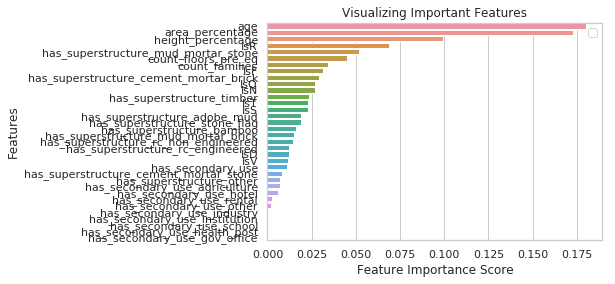

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [429]:
ypreds = rf.predict(res_test_one_hot)

In [430]:
target = {1: '1', 2: '2', 3: '3'}
prediction.damage_grade.replace(tar, inplace=True)

In [431]:
prediction=pd.DataFrame({'building_id': test['building_id'], 'damage_grade':ypreds})

In [432]:
prediction.to_csv('submission.csv', index=False)

In [433]:
prediction.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
